# Compare DEGs (bulk mouse vs single-nuclei mouse)

## <br> 1. Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
from matplotlib_venn import venn2

In [2]:
import os

# Directory name
figures_dir = "Figures"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"Directory '{figures_dir}' created.")
else:
    print(f"Directory '{figures_dir}' already exists.")


Directory 'Figures' already exists.


## <br> 2. Import Data

In [3]:
Bulk_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)

Bulk_Master['Dose'] = Bulk_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.03', '0.1', '0.3', '1', '3', '10', '30']

# Convert 'Dose' column to a categorical type with the specified order
Bulk_Master['Dose'] = pd.Categorical(Bulk_Master['Dose'], categories=dose_order, ordered=True)

Bulk_Master

/tmp/local/47291513/ipykernel_1925430/68761391.py:1: DtypeWarning: Columns (18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  Bulk_Master = pd.read_csv('../02_Mouse_Bulk_RNAseq/04_Deseq2/RDDR_Deseq2_Master_Wald_Bulk_Mouse_with_Mouse_MGI.txt',


,Gene,MGI_Symbol,Dose,pDRE,AHR,Type,baseMean,Log2FC,Fold-Change,lfcSE,...,end,frame,score,strand,source,feature,gene_id,transcript_id,NR_annotation,Coord
0,lnc100,.,0.03,1,0,lncRNA,0.739442,0.868966,1.826353,2.431492,...,21180041,.,1000,+,Genebody_mm10_lnc48261,exon,lnc_inter_chr1_100,lnc_inter_chr1_100,lnc100,Chr1:21176510-21180041
1,lnc1000,Gm32128,0.03,0,8,lncRNA,0.819827,0.927614,1.902128,1.989652,...,191424644,.,1000,+,Genebody_mm10_lnc48261,exon,lnc_inter_chr1_1000,lnc_inter_chr1_1000,lnc1000,Chr1:191420198-191424644
2,lnc10003,Gm51875,0.03,1,0,lncRNA,0.300613,0.000000,1.000000,5.670347,...,95012537,.,1000,-,Genebody_mm10_lnc48261,exon,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003,Chr11:95006956-95012537
3,lnc10003,Gm36385,0.03,1,0,lncRNA,0.300613,0.000000,1.000000,5.670347,...,95012537,.,1000,-,Genebody_mm10_lnc48261,exon,lnc_as_chr11_10003,lnc_as_chr11_10003,lnc10003,Chr11:95006956-95012537
4,lnc10004,Dlx4os,0.03,2,0,lncRNA,2.064386,0.000000,1.000000,1.741573,...,95159234,.,1000,+,Genebody_mm10_lnc48261,exon,lnc_as_chr11_10004,lnc_as_chr11_10004,lnc10004_Dlx4os,Chr11:95145015-95159234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363953,mt-Nd4l,.,30,0,0,protein_coding,56.750674,-0.611662,0.654442,0.307382,...,10173,.,.,+,insdc,exon,ENSMUSG00000065947,ENSMUSG00000065947,NaN,ChrMT:9876-10173
363954,mt-Nd4,.,30,0,0,protein_coding,98607.338313,-0.549323,0.683341,0.082827,...,11544,.,.,+,insdc,exon,ENSMUSG00000064363,ENSMUSG00000064363,NaN,ChrMT:10166-11544
363955,mt-Nd5,.,30,0,0,protein_coding,67634.349017,-0.101631,0.931979,0.101155,...,13565,.,.,+,insdc,exon,ENSMUSG00000064367,ENSMUSG00000064367,NaN,ChrMT:11741-13565
363956,mt-Nd6,.,30,0,0,protein_coding,19754.263700,0.154445,1.112993,0.186004,...,14070,.,.,-,insdc,exon,ENSMUSG00000064368,ENSMUSG00000064368,NaN,ChrMT:13551-14070


In [4]:
snRNAseq_Master = pd.read_csv('../01_Mouse_snRNAseq/03b_RDDR_DEG_Analysis/Results/03d_MASTER_Deseq2_Concatonated/RDDR_Deseq2_Master_Wald_with_MGI.txt',
                                              delimiter = '\t',
                                              index_col=0)

snRNAseq_Master['Dose'] = snRNAseq_Master['Dose'].apply(lambda x: '{:.2g}'.format(x)).astype('category')

# Specify the desired order for the Dose levels
dose_order = ['0.01', '0.03', '0.1', '0.3', '1', '3', '10', '30']

# Convert 'Dose' column to a categorical type with the specified order
snRNAseq_Master['Dose'] = pd.Categorical(snRNAseq_Master['Dose'], categories=dose_order, ordered=True)

snRNAseq_Master

,Gene,MGI_Symbol,Celltype,Dose,Type,pDRE,AHR,baseMean,Chr,Start,End,Strand,Coord,NR_Annotation,log2FoldChange,Fold-Change,lfcSE,stat,pvalue,padj
0,lnc31752,Malat1,B Cells,0.01,lncRNA,2,2,6734.923397,19,5792614,5802955,-,Chr19:5792614-5802955,lnc31752_Mascrna#Malat1,0.032775,1.022978,0.152624,0.214740,8.299699e-01,1.000000
1,lnc4822,.,B Cells,0.01,lncRNA,0,1,3758.095623,6,3181101,3202501,+,Chr6:3181101-3202501,lnc4822,-0.328513,0.796357,0.345835,-0.949910,3.421579e-01,1.000000
2,Foxp1,9130401L11Rik,B Cells,0.01,NM,45,19,1141.625268,6,98925341,99184961,-,Chr6:98925341-99184961,NaN,0.087118,1.062246,0.243277,0.358101,7.202678e-01,1.000000
3,Foxp1,6030492E11Rik,B Cells,0.01,NM,45,19,1141.625268,6,98925341,99184961,-,Chr6:98925341-99184961,NaN,0.087118,1.062246,0.243277,0.358101,7.202678e-01,1.000000
4,Foxp1,Gm38865,B Cells,0.01,NM,45,19,1141.625268,6,98925341,99184961,-,Chr6:98925341-99184961,NaN,0.087118,1.062246,0.243277,0.358101,7.202678e-01,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431475,Zfp180,.,pDCs,30,NM,5,1,1.733836,7,24081896,24107708,+,Chr7:24081896-24107708,NaN,1.686459,3.218657,1.402388,1.202562,2.291459e-01,0.438051
1431476,Zfp362,.,pDCs,30,NM,5,2,2.112682,4,128773084,128806112,-,Chr4:128773084-128806112,NaN,-0.134984,0.910680,1.151324,-0.117242,9.066681e-01,0.961245
1431477,lnc13470,Gm32461,pDCs,30,lncRNA,3,2,3.300291,16,86758431,86817529,-,Chr16:86758431-86817529,lnc13470_Gm32461,-7.234780,0.006639,1.405771,-5.146486,2.654112e-07,0.000005
1431478,lnc42236,.,pDCs,30,lncRNA,1,1,1.577634,6,49261606,49263243,-,Chr6:49261606-49263243,lnc42236,-0.532052,0.691571,0.914896,-0.581543,5.608744e-01,0.749372


## <br> 3a. Determine DE lncRNAs in Bulk RNAseq vs snRNAseq

In [5]:
Bulk_Master_lncRNA = Bulk_Master[(Bulk_Master['Type']== 'lncRNA') |
                                     (Bulk_Master['Type']== 'antisense') |
                                     (Bulk_Master['Type']== 'lincRNA') |
                                     (Bulk_Master['Type']== 'NR') |
                                     (Bulk_Master['Type']== 'lncOfInterest')]

Bulk_Master_lncRNA_DEGs = Bulk_Master_lncRNA[((Bulk_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (Bulk_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (Bulk_Master_lncRNA['padj'] <= 0.05)]

Bulk_Master_lncRNA_DEGs_with_AHR = Bulk_Master_lncRNA_DEGs[Bulk_Master_lncRNA_DEGs['AHR'] >= 1]

Bulk_Master_lncRNA_DEGs_with_AHR_and_DRE = Bulk_Master_lncRNA_DEGs_with_AHR[Bulk_Master_lncRNA_DEGs_with_AHR['pDRE'] >= 1]


# Number of unique 'Gene' values for each DataFrame
num_unique_genes_lncRNA = Bulk_Master_lncRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Bulk_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = Bulk_Master_lncRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = Bulk_Master_lncRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Bulk RNAseq")
print("Total lncRNAs:", num_unique_genes_lncRNA)
print("Total DE lncRNAs:", num_unique_genes_DEGs)
print("Total DE lncRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE lncRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)

Bulk RNAseq
Total lncRNAs: 29035
Total DE lncRNAs: 2356
Total DE lncRNAs with AHR binding: 1086
Total DE lncRNAs with AHR binding and DRE: 787


In [6]:
snRNAseq_Master_lncRNA = snRNAseq_Master[(snRNAseq_Master['Type']== 'lncRNA') |
                                     (snRNAseq_Master['Type']== 'antisense') |
                                     (snRNAseq_Master['Type']== 'lincRNA') |
                                     (snRNAseq_Master['Type']== 'NR') |
                                     (snRNAseq_Master['Type']== 'lncOfInterest')]

snRNAseq_Master_lncRNA_DEGs = snRNAseq_Master_lncRNA[((snRNAseq_Master_lncRNA['Fold-Change'] >= 1.5) | 
                                                 (snRNAseq_Master_lncRNA['Fold-Change'] <= 1/1.5)) &
                                                 (snRNAseq_Master_lncRNA['padj'] <= 0.05)]

snRNAseq_Master_lncRNA_DEGs_with_AHR = snRNAseq_Master_lncRNA_DEGs[snRNAseq_Master_lncRNA_DEGs['AHR'] >= 1]

snRNAseq_Master_lncRNA_DEGs_with_AHR_and_DRE = snRNAseq_Master_lncRNA_DEGs_with_AHR[snRNAseq_Master_lncRNA_DEGs_with_AHR['pDRE'] >= 1]


# Number of unique 'Gene' values for each DataFrame
num_unique_genes_lncRNA = snRNAseq_Master_lncRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = snRNAseq_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = snRNAseq_Master_lncRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = snRNAseq_Master_lncRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("snRNAseq")
print("Total lncRNAs:", num_unique_genes_lncRNA)
print("Total DE lncRNAs:", num_unique_genes_DEGs)
print("Total DE lncRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE lncRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)


snRNAseq
Total lncRNAs: 13499
Total DE lncRNAs: 5495
Total DE lncRNAs with AHR binding: 2444
Total DE lncRNAs with AHR binding and DRE: 1694


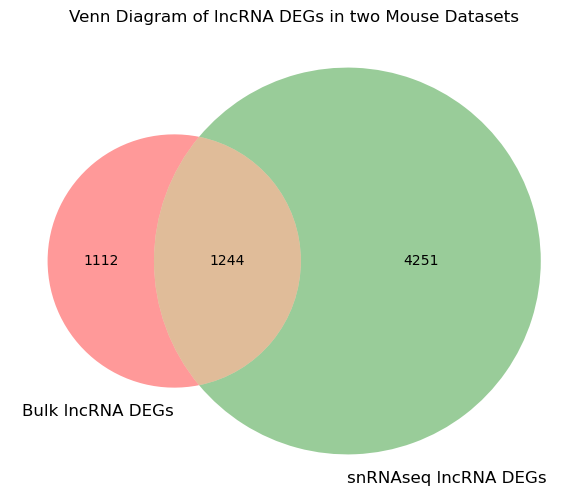

In [7]:
# Prepare the data
Bulk_lncRNA_DEGs_List = Bulk_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')
snRNAseq_Master_lncRNA_DEGs_List = snRNAseq_Master_lncRNA_DEGs['Gene'].drop_duplicates(keep='first')

# Convert to sets
bulk_set = set(Bulk_lncRNA_DEGs_List)
snrna_set = set(snRNAseq_Master_lncRNA_DEGs_List)

# Create Venn diagram
plt.figure(figsize=(8, 6))
venn2([bulk_set, snrna_set], ('Bulk lncRNA DEGs', 'snRNAseq lncRNA DEGs'))
plt.title("Venn Diagram of lncRNA DEGs in two Mouse Datasets")

# Export the plot as a PDF
plt.savefig('Figures/Venn_Bulk_vs_snRNAseq_Mouse_DE_lncRNAs.pdf')

plt.show()


## <br> 3b. Determine DE mRNAs in Bulk RNAseq vs snRNAseq

In [8]:
Bulk_Master_mRNA = Bulk_Master[(Bulk_Master['Type'] == 'NM') |
                                    (Bulk_Master['Type'] == 'NM#NR')|
                                    (Bulk_Master['Type'] == 'protein_coding')]

Bulk_Master_mRNA_DEGs = Bulk_Master_mRNA[((Bulk_Master_mRNA['Fold-Change'] >= 1.5) | 
                                              (Bulk_Master_mRNA['Fold-Change'] <= 1/1.5)) &
                                              (Bulk_Master_mRNA['padj'] <= 0.05)]

Bulk_Master_mRNA_DEGs_with_AHR = Bulk_Master_mRNA_DEGs[Bulk_Master_mRNA_DEGs['AHR'] >= 1]

Bulk_Master_mRNA_DEGs_with_AHR_and_DRE = Bulk_Master_mRNA_DEGs_with_AHR[Bulk_Master_mRNA_DEGs_with_AHR['pDRE'] >= 1]

# Number of unique 'Gene' values for each DataFrame
num_unique_genes_mRNA = Bulk_Master_mRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = Bulk_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = Bulk_Master_mRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = Bulk_Master_mRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("Bulk RNAseq")
print("Total mRNAs:", num_unique_genes_mRNA)
print("Total DE mRNAs:", num_unique_genes_DEGs)
print("Total DE mRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE mRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)

Bulk RNAseq
Total mRNAs: 17140
Total DE mRNAs: 6061
Total DE mRNAs with AHR binding: 3410
Total DE mRNAs with AHR binding and DRE: 2996


In [9]:
snRNAseq_Master_mRNA = snRNAseq_Master[(snRNAseq_Master['Type'] == 'NM') |
                                    (snRNAseq_Master['Type'] == 'NM#NR')|
                                    (snRNAseq_Master['Type'] == 'protein_coding')]

snRNAseq_Master_mRNA_DEGs = snRNAseq_Master_mRNA[((snRNAseq_Master_mRNA['Fold-Change'] >= 1.5) | 
                                              (snRNAseq_Master_mRNA['Fold-Change'] <= 1/1.5)) &
                                              (snRNAseq_Master_mRNA['padj'] <= 0.05)]

snRNAseq_Master_mRNA_DEGs_with_AHR = snRNAseq_Master_mRNA_DEGs[snRNAseq_Master_mRNA_DEGs['AHR'] >= 1]

snRNAseq_Master_mRNA_DEGs_with_AHR_and_DRE = snRNAseq_Master_mRNA_DEGs_with_AHR[snRNAseq_Master_mRNA_DEGs_with_AHR['pDRE'] >= 1]

# Number of unique 'Gene' values for each DataFrame
num_unique_genes_mRNA = snRNAseq_Master_mRNA['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_DEGs = snRNAseq_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR = snRNAseq_Master_mRNA_DEGs_with_AHR['Gene'].drop_duplicates(keep='first').nunique()
num_unique_genes_with_AHR_and_DRE = snRNAseq_Master_mRNA_DEGs_with_AHR_and_DRE['Gene'].drop_duplicates(keep='first').nunique()

# Print the results
print("snRNAseq")
print("Total mRNAs:", num_unique_genes_mRNA)
print("Total DE mRNAs:", num_unique_genes_DEGs)
print("Total DE mRNAs with AHR binding:", num_unique_genes_with_AHR)
print("Total DE mRNAs with AHR binding and DRE:", num_unique_genes_with_AHR_and_DRE)

snRNAseq
Total mRNAs: 14322
Total DE mRNAs: 9463
Total DE mRNAs with AHR binding: 5667
Total DE mRNAs with AHR binding and DRE: 5038


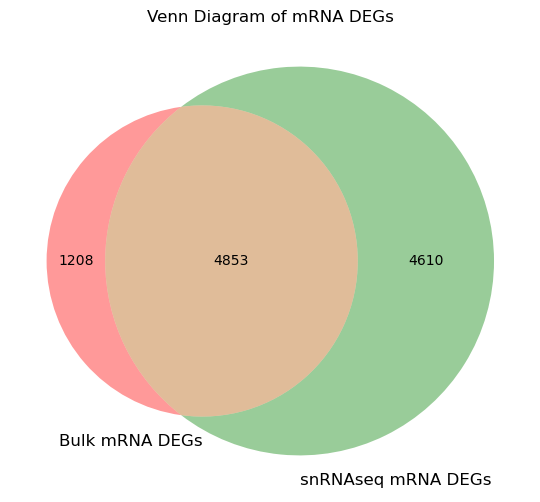

In [10]:
# Prepare the data
Bulk_mRNA_DEGs_List = Bulk_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first')
snRNAseq_Master_mRNA_DEGs_List = snRNAseq_Master_mRNA_DEGs['Gene'].drop_duplicates(keep='first')

# Convert to sets
bulk_set = set(Bulk_mRNA_DEGs_List)
snrna_set = set(snRNAseq_Master_mRNA_DEGs_List)

# Create Venn diagram
plt.figure(figsize=(8, 6))
venn2([bulk_set, snrna_set], ('Bulk mRNA DEGs', 'snRNAseq mRNA DEGs'))
plt.title("Venn Diagram of mRNA DEGs")

# Export the plot as a PDF
plt.savefig('Figures/Venn_Bulk_vs_snRNAseq_Mouse_DE_mRNAs.pdf')

plt.show()
